In [1]:
import numpy as np
from model import ModelClass

In [2]:
dataX = np.loadtxt("q4x.dat")  # space separated
dataY = np.loadtxt("q4y.dat", dtype = str)

model = ModelClass()
X, Y = model.normalizeData(dataX, dataY)

Normalizing the given data into N(0,1)
Shape of X is : (100, 2)
Shape of Y is : (100,)


In [3]:
# Learn the Gaussian Discriminant Analysis parameters using the closed form equations described
# in class. Assume that both the classes have the same co-variance matrix i.e. Σ0 = Σ1 = Σ. Report the
# values of the means, µ0 and µ1, and the co-variance matrix Σ.
# phi0, phi1, mu0, mu1, sharedCovΣ = model.getParameters()
phi0, phi1, mu0, mu1, sharedCovΣ = model.getParameters()

Prior prob of P(y='Canada') : 0.5
Prior prob of P(y='Alaska') : 0.5
mean of data with (Y == 1) :: mu1 :  [ 0.75529433 -0.68509431]
mean of data with (Y == 0) :: mu0 :  [-0.75529433  0.68509431]
sharedCovΣ:  [[ 0.42953048 -0.02247228]
 [-0.02247228  0.53064579]]


<AxesSubplot:title={'center':'Training Data: Alaska vs Canada Salmons'}, xlabel='X1 (normalized growth ring in fresh water)', ylabel='X2 (normalized growth ring in marine water)'>

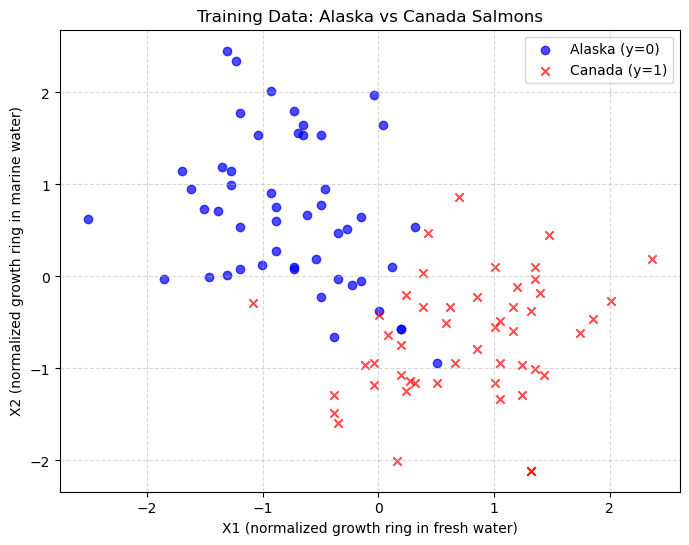

In [4]:
# Question 2 :: Plot the training data corresponding to the two coordinates of the input features, and you
# should use a different symbol for each point plotted to indicate whether that example had label Canada or
# Alaska.
model.plotTrainingData()

value of W:  [ 3.38925452 -2.43858399]  And value of b  1.1102230246251565e-15


<AxesSubplot:title={'center':'Training Data: Alaska vs Canada Salmons'}, xlabel='X1 (normalized growth ring in fresh water)', ylabel='X2 (normalized growth ring in marine water)'>

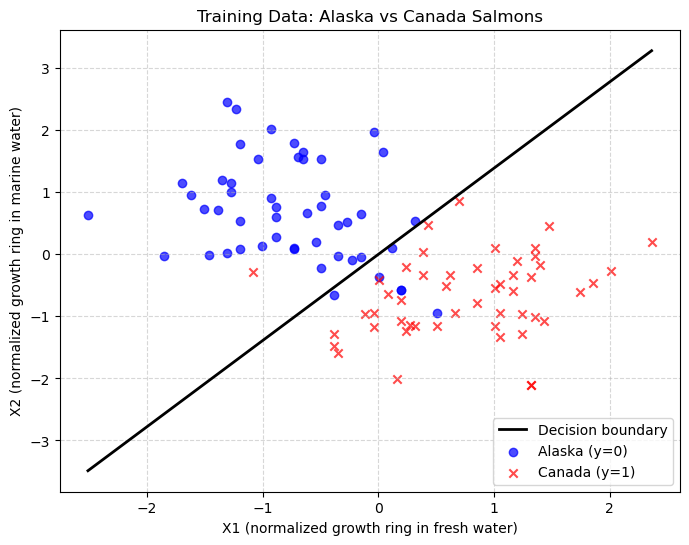

In [5]:
# Question 3 :: Describe the equation of the boundary separating the two regions in terms of the parameters
# µ0, µ1 and Σ. Recall that GDA results in a linear separator when the two classes have identical co-variance
# matrix. Along with the data points plotted in the part above, plot (on the same figure) decision boundary
# fit by GDA.
W, b = model.getParametersForDecisionBoundaryForLinearGDA()
model.plotLinearGDA()

In [6]:
# Question 4
# In general, GDA allows each of the target classes to have its own covariance matrix. This
# results (in general) results in a quadratic boundary separating the two class regions. In this case, the
# derive the maximum-likelihood estimate of the co-variance matrix Σ0

# And similarly, for Σ1. The expressions for the means remain the same as before. 
#Implement GDA for the above problem in this more general setting. Report the values of the parameter estimates i.e. µ0, µ1, Σ0,
# Σ1.
Σ0, Σ1 = model.getActualCovarianceMatrices()
P, Q, R = model.getQuadraticGDAParams()

Covariance Matrix Σ0 is :  [[ 0.38158978 -0.15486516]
 [-0.15486516  0.64773717]]
Covariance Matrix Σ1 is :  [[0.47747117 0.1099206 ]
 [0.1099206  0.41355441]]
Value of P :  [[ 0.3356739   0.64341817]
 [ 0.64341817 -0.43296599]]
Value of Q :  [ 3.80785319 -2.85967306]
Value of R :  -0.8632061275820547


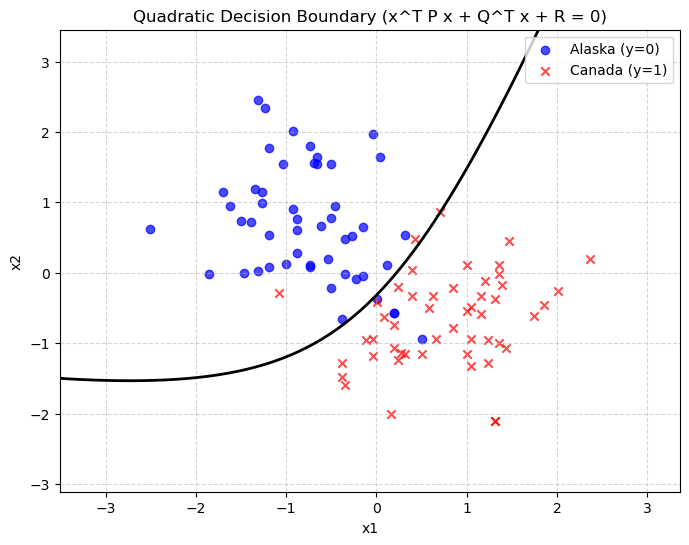

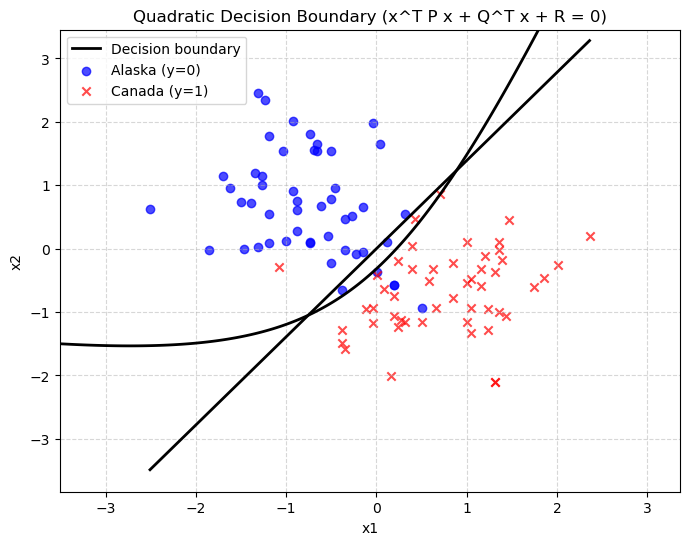

<AxesSubplot:title={'center':'Quadratic Decision Boundary (x^T P x + Q^T x + R = 0)'}, xlabel='x1', ylabel='x2'>

In [7]:
# Question 5
# Describe the equation for the quadratic boundary separating the two regions in terms of the
# parameters µ0, µ1 and Σ0, Σ1. On the graph plotted earlier displaying the data points and the linear
# separating boundary, also plot the quadratic boundary obtained in the previous step.
model.plot_quadratic_boundary()
model.plot_quadratic_boundary(addLinearBoundary = True)

In [ ]:
# Question 6 
# So finally after ploting everything :: we can come up to these conclusions

# In case of Quadratic GDA decisiopn boundary ::
# The boundary is curved because each class has its own covariance matrix

# That’s why the decision function becomes quadratic in 𝑥
# So we see curve bending towards class distribution of Alaska(Y==0) meaning it adapts more flexibly to the class distributions

# And det(Σ0) = 0.2232(Class distribution of Alaska) and det(Σ1) = 0.1854(Class distribution of Canada),
# so to cover that greater co-variance in class distribtion(Y==0), the curve is bended centering Y == 0

# In case of Linear GDA,
# Shared covariance assumption :: Σ0 == Σ1
# Which explains the linearty here

# So Quadratic GDA can capture more complex separation than Linear.

# Conclusions:
#     Linear GDA assumes both classes share the same covariance — leads to a straight decision boundary.
#     Simpler, less flexible, but works well if assumption holds.

# Quadratic GDA allows different covariances — leads to a quadratic (curved) decision boundary.More flexible, fits data better, 
# but may risk overfitting if little data.

# In this dataset, Quadratic clearly adapts better to the real separation between Canada vs Alaska salmons.